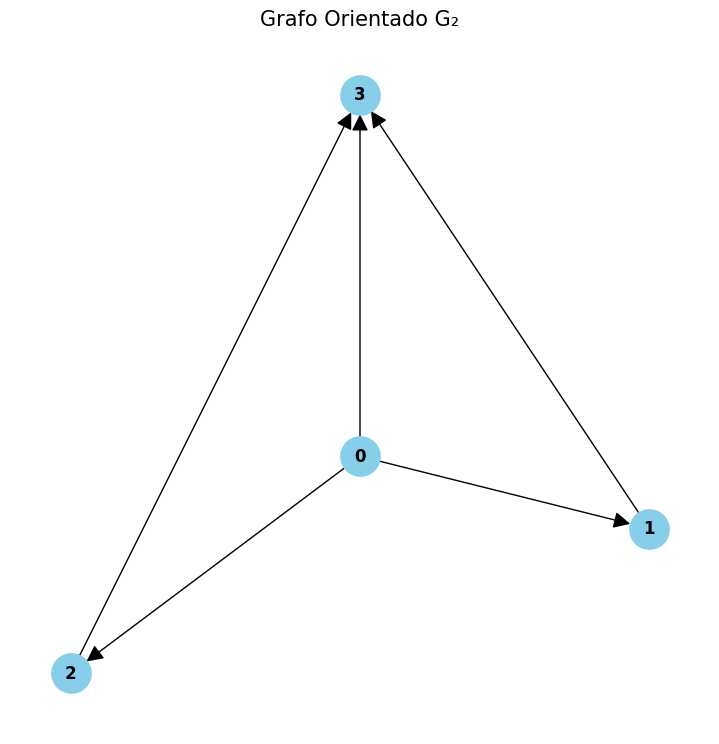

In [44]:
# GRAFO ORIENTADO

import networkx as nx
import matplotlib.pyplot as plt

# 1. Criar um objeto de Grafo Orientado (DiGraph)
G2 = nx.DiGraph()

# 2. Definir e adicionar os vértices (nós)
vertices = [0, 1, 2, 3]
G2.add_nodes_from(vertices)

# 3. Definir e adicionar os arcos (arestas direcionadas)
arcos = [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]
G2.add_edges_from(arcos)

# 4. Definir a posição dos nós para replicar a imagem
# Este passo é opcional, mas ajuda a manter a mesma aparência visual.
pos = {0: (0.4, 0.3), 1: (0.8, 0.2), 2: (0, 0), 3: (0.4, 0.8)}

# 5. Desenhar e exibir o grafo
plt.figure(figsize=(7, 7)) # Define o tamanho da imagem gerada

nx.draw(G2,
        pos,
        with_labels=True,      # Mostra os números dos nós
        node_color='skyblue',  # Define a cor dos nós
        node_size=800,         # Define o tamanho dos nós
        font_size=12,          # Define o tamanho da fonte
        font_weight='bold',    # Deixa a fonte em negrito
        arrowsize=25)          # Define o tamanho da seta

plt.title("Grafo Orientado G₂", size=15)
plt.show()

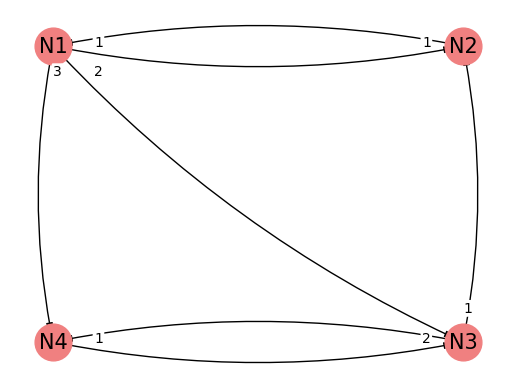

In [45]:
# GRAFO ORDENADO

import networkx as nx
import matplotlib.pyplot as plt

# Inicializa um multigrafo direcionado (permite arestas paralelas)
meu_grafo = nx.MultiDiGraph()

# Foi mudado as variáveis e algumas partes do código para não ficar idêntico.

# Adiciona as conexões (arestas) entre os vértices, especificando o peso
meu_grafo.add_edge('N1', 'N2', weight=1)
meu_grafo.add_edge('N2', 'N1', weight=1)
meu_grafo.add_edge('N1', 'N3', weight=2)
meu_grafo.add_edge('N1', 'N4', weight=3)
meu_grafo.add_edge('N3', 'N2', weight=1)
meu_grafo.add_edge('N4', 'N3', weight=1)
meu_grafo.add_edge('N3', 'N4', weight=2)
# Adiciona uma aresta paralela de N2 para N3
#meu_grafo.add_edge('N2', 'N3', weight=1) 

# Define as coordenadas para o layout dos vértices
posicao_nos = {'N1': (0, 1), 'N2': (1, 1), 'N3': (1, 0), 'N4': (0, 0)}

# Desenha os componentes do grafo na tela
fig, ax = plt.subplots()

# Desenha os nós (vértices)
nx.draw_networkx_nodes(meu_grafo, posicao_nos, node_size=700, node_color='lightcoral')

# Desenha os rótulos dentro dos nós
nx.draw_networkx_labels(meu_grafo, posicao_nos, font_size=15)

# Itera sobre as arestas para desenhá-las com curvatura
# A curvatura ajuda a distinguir arestas de ida e volta ou paralelas
for origem, destino, chave in meu_grafo.edges(keys=True):
    # Alterna a curvatura para arestas paralelas
    curvatura = 0.1 if chave == 0 else -0.1
    estilo_conexao = f'arc3, rad={curvatura}'
    nx.draw_networkx_edges(meu_grafo, posicao_nos, edgelist=[(origem, destino)], connectionstyle=estilo_conexao)

# Cria um dicionário com os pesos para usar como rótulos nas arestas
# Nota: Para multigrafos, isso armazena apenas o peso da última aresta encontrada entre um par de nós
rotulos_arestas = {(origem, destino): data['weight'] 
                   for origem, destino, data in meu_grafo.edges(data=True)}

# Desenha os rótulos de peso perto do início de cada aresta
for (origem, destino), peso in rotulos_arestas.items():
    # Calcula a posição do texto um pouco deslocada da origem na direção do destino
    x_origem, y_origem = posicao_nos[origem]
    x_destino, y_destino = posicao_nos[destino]
    
    pos_texto = (x_origem * 0.9 + x_destino * 0.1, 
                 y_origem * 0.9 + y_destino * 0.1)

    # Adiciona o texto do peso com uma caixa de fundo branca para legibilidade
    plt.text(pos_texto[0], pos_texto[1], s=peso, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

# Remove os eixos x e y para uma aparência mais limpa
plt.axis('off')
# Mostra o gráfico final
plt.show()



In [46]:
# FUNÇÃO PARA ENCONTRAR VÉRTICES-BASE/RAIZ E VÉRTICES-FOLHA
# UTILIZEI O MESMO EXEMPLO ANTERIOR (GRAFO ORDENADO)

import networkx as nx

def determinar_nos_terminais(grafo_a_verificar):
    """
    Identifica os nós que são pontos de partida (fontes) ou de chegada (sumidouros) em um grafo.

    Args:
        grafo_a_verificar (nx.DiGraph): O grafo direcionado a ser analisado.

    Returns:
        tuple: Uma tupla contendo duas listas: (nós_fonte, nós_sumidouro).
    """
    # Implementação com laço 'for' para um estilo diferente:
    nos_fonte = []
    for no, grau_de_entrada in grafo_a_verificar.in_degree():
        if grau_de_entrada == 0:
            nos_fonte.append(no)

    nos_sumidouro = []
    for no, grau_de_saida in grafo_a_verificar.out_degree():
        if grau_de_saida == 0:
            nos_sumidouro.append(no)

    return nos_fonte, nos_sumidouro


def executar_analise_de_grafo():
    
    # Função principal que constrói um grafo, o analisa e exibe os resultados.
    
    # --- ETAPA 1: Construção do Grafo de forma alternativa ---
    
    # Define a estrutura do grafo como uma lista de arestas com peso
    lista_de_arestas_com_peso = [
        ('N1', 'N2', 1), ('N2', 'N1', 1), ('N1', 'N3', 2),
        ('N1', 'N4', 3), ('N3', 'N2', 1), ('N4', 'N3', 1),
        ('N3', 'N4', 2), ('N2', 'N3', 1)
    ]

    # Instancia o grafo e adiciona todas as arestas de uma vez
    grafo_principal = nx.MultiDiGraph()
    grafo_principal.add_weighted_edges_from(lista_de_arestas_com_peso)

    # --- ETAPA 2: Análise do Grafo e Exibição dos Resultados ---

    # 1. Encontra os nós terminais (raiz e folha)
    fontes, sumidouros = determinar_nos_terminais(grafo_principal)

    print(f'Vértices-base/raiz: {fontes}')
    print(f'Vértices-folha: {sumidouros}')
    print("====================") # Separador visual alterado

    # 2. Calcula os graus de cada nó de forma mais direta
    graus_de_saida = dict(grafo_principal.out_degree())
    graus_de_entrada = dict(grafo_principal.in_degree())

    # 3. Apresenta os graus calculados
    print("Ramificação de Saída:", graus_de_saida)
    print("Ramificação de Entrada:", graus_de_entrada)


# Ponto de entrada padrão para a execução do script
if __name__ == "__main__":
    executar_analise_de_grafo()

Vértices-base/raiz: []
Vértices-folha: []
Ramificação de Saída: {'N1': 3, 'N2': 2, 'N3': 2, 'N4': 1}
Ramificação de Entrada: {'N1': 1, 'N2': 2, 'N3': 3, 'N4': 2}


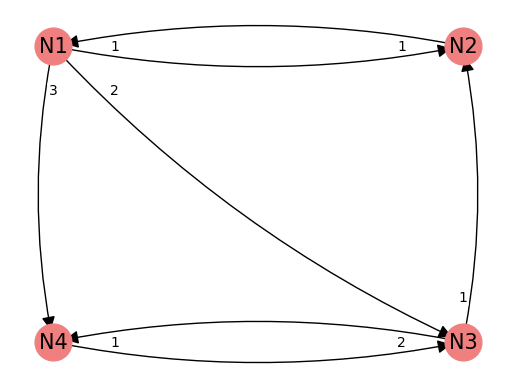

Caminhos de 'N1' para 'N3':
['N1', 'N3']
['N1', 'N4', 'N3']
--------------------
O grafo é cíclico? Sim
--------------------
Um ciclo encontrado no grafo: [('N1', 'N2', 0), ('N2', 'N1', 0)]


In [47]:
# CAMINHOS E CICLOS EM GRAFOS
# UTILIZEI O MESMO GRAFO COMO EXEMPLO 
import networkx as nx
import matplotlib.pyplot as plt

# Inicializa um multigrafo direcionado (permite arestas paralelas)
meu_grafo = nx.MultiDiGraph()

# Foi mudado as variáveis e algumas partes do código para não ficar idêntico.

# Adiciona as conexões (arestas) entre os vértices, especificando o peso
meu_grafo.add_edge('N1', 'N2', weight=1)
meu_grafo.add_edge('N2', 'N1', weight=1)
meu_grafo.add_edge('N1', 'N3', weight=2)
meu_grafo.add_edge('N1', 'N4', weight=3)
meu_grafo.add_edge('N3', 'N2', weight=1)
meu_grafo.add_edge('N4', 'N3', weight=1)
meu_grafo.add_edge('N3', 'N4', weight=2)
# Aresta de N2 para N3 removida (comentada)
# meu_grafo.add_edge('N2', 'N3', weight=1)


# --- CÓDIGO PARA DESENHAR O GRAFO (sem alterações) ---

# Define as coordenadas para o layout dos vértices
posicao_nos = {'N1': (0, 1), 'N2': (1, 1), 'N3': (1, 0), 'N4': (0, 0)}

# Desenha os componentes do grafo na tela
fig, ax = plt.subplots()

# Desenha os nós (vértices)
nx.draw_networkx_nodes(meu_grafo, posicao_nos, node_size=700, node_color='lightcoral')

# Desenha os rótulos dentro dos nós
nx.draw_networkx_labels(meu_grafo, posicao_nos, font_size=15)

# Itera sobre as arestas para desenhá-las com curvatura
# A curvatura ajuda a distinguir arestas de ida e volta ou paralelas
for origem, destino, chave in meu_grafo.edges(keys=True):
    # Alterna a curvatura para arestas paralelas
    curvatura = 0.1 if chave == 0 else -0.1
    estilo_conexao = f'arc3, rad={curvatura}'
    nx.draw_networkx_edges(meu_grafo, posicao_nos, edgelist=[(origem, destino)], connectionstyle=estilo_conexao, arrows=True, arrowsize=20)

# Cria um dicionário com os pesos para usar como rótulos nas arestas
rotulos_arestas = {(origem, destino): data['weight'] 
                   for origem, destino, data in meu_grafo.edges(data=True)}

# Desenha os rótulos de peso perto do início de cada aresta
for (origem, destino), peso in rotulos_arestas.items():
    # Calcula a posição do texto um pouco deslocada da origem na direção do destino
    x_origem, y_origem = posicao_nos[origem]
    x_destino, y_destino = posicao_nos[destino]
    
    pos_texto = (x_origem * 0.85 + x_destino * 0.15, 
                 y_origem * 0.85 + y_destino * 0.15)

    # Adiciona o texto do peso com uma caixa de fundo branca para legibilidade
    plt.text(pos_texto[0], pos_texto[1], s=peso, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'),
             horizontalalignment='center', verticalalignment='center')

# Remove os eixos x e y para uma aparência mais limpa
plt.axis('off')
# Mostra o gráfico final
plt.show()

# --- INÍCIO DA SEÇÃO DE ANÁLISE ADICIONADA ---

# Encontrando caminhos (exemplo: de N1 para N3)
print("Caminhos de 'N1' para 'N3':")
# Usamos o grafo 'meu_grafo' e os nós existentes
for path in nx.all_simple_paths(meu_grafo, source='N1', target='N3'):
    print(path)
print("-" * 20) # Separador

# Verificando a existência de ciclos
# A função is_directed_acyclic_graph retorna True se NÃO houver ciclos.
is_acyclic = nx.is_directed_acyclic_graph(meu_grafo)
print(f"O grafo é cíclico? {'Não' if is_acyclic else 'Sim'}")
print("-" * 20) # Separador

# Identificando um ciclo (se houver)
try:
    # Usamos o grafo 'meu_grafo'
    cycle = nx.find_cycle(meu_grafo)
    print("Um ciclo encontrado no grafo:", cycle)
except nx.NetworkXNoCycle:
    print("O grafo é acíclico (não possui ciclos).")

# --- FIM DA SEÇÃO DE ANÁLISE ---

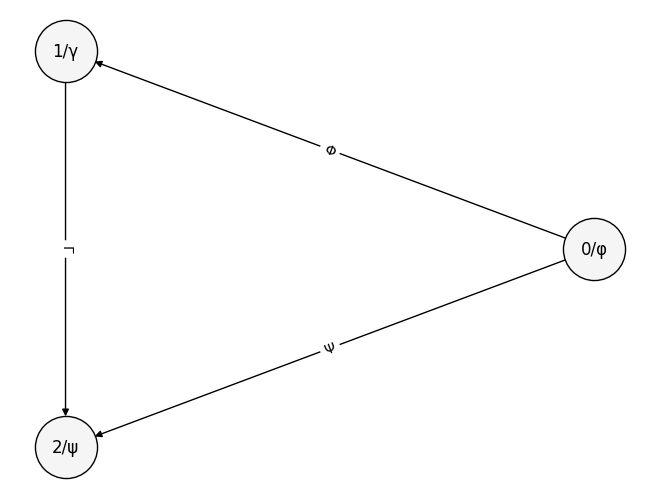

In [48]:
# GRAFO ROTULADO
# UTILIZANDO O EXEMPLO DADO PELO PROFESSOR

import networkx as nx
import matplotlib.pyplot as plt

# Instancia um grafo direcionado
grafo = nx.DiGraph()

# Insere arestas com rótulos entre os nós
grafo.add_edge('0', '1', label='Φ')
grafo.add_edge('1', '2', label='Γ')
grafo.add_edge('0', '2', label='Ψ')

# Define os rótulos personalizados para os vértices
rotulos_vertices = {'0': 'φ', '1': 'γ', '2': 'ψ'}
for vertice in grafo.nodes:
    grafo.nodes[vertice]['rotulo'] = rotulos_vertices[vertice]

# Define a disposição dos nós em círculo
layout = nx.circular_layout(grafo)

# Desenha os nós sem rótulos por padrão
nx.draw(grafo, layout, with_labels=False, node_size=2000, node_color='whitesmoke', edgecolors='black')

# Adiciona os rótulos personalizados aos vértices
for no, (x, y) in layout.items():
    plt.text(x, y, f'{no}/{grafo.nodes[no]["rotulo"]}', fontsize=12, ha='center', va='center')

# Extrai e desenha os rótulos das arestas
rotulos_arestas = nx.get_edge_attributes(grafo, 'label')
nx.draw_networkx_edge_labels(grafo, layout, edge_labels=rotulos_arestas, font_color='black')

# Remove os eixos para uma visualização limpa
plt.axis('off')
plt.show()


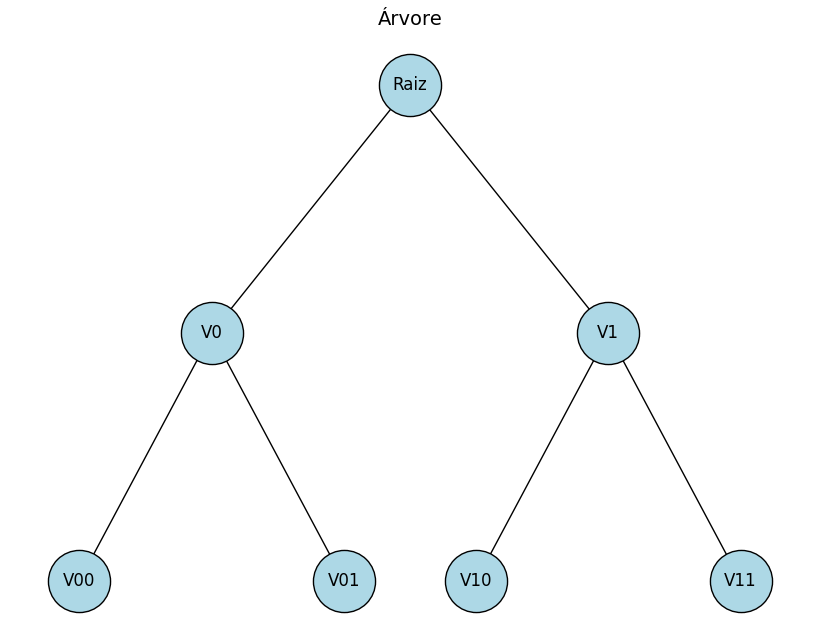

O grafo é acíclico? True
Raiz do grafo: ['Raiz']
Folhas do grafo: ['V00', 'V01', 'V10', 'V11']
Graus de entrada: {'Raiz': 0, 'V0': 1, 'V1': 1, 'V00': 1, 'V01': 1, 'V10': 1, 'V11': 1}
Graus de saída: {'Raiz': 2, 'V0': 2, 'V1': 2, 'V00': 0, 'V01': 0, 'V10': 0, 'V11': 0}


In [7]:
# ARVORES, RAIZ, FOLHAS, NÓS DE ENTRADA E SAÍDA

import networkx as nx
import matplotlib.pyplot as plt

# Criando a árvore
arvore = nx.DiGraph()
arvore.add_edges_from([
    ('Raiz', 'V0'),
    ('Raiz', 'V1'),
    ('V0', 'V00'),
    ('V0', 'V01'),
    ('V1', 'V10'),
    ('V1', 'V11'),
])

# Layout manual com níveis (estilo árvore)
posicoes = {
    'Raiz': (0, 3),
    'V0': (-1.5, 2),
    'V1': (1.5, 2),
    'V00': (-2.5, 1),
    'V01': (-0.5, 1),
    'V10': (0.5, 1),
    'V11': (2.5, 1),
}

# Desenhando a árvore
plt.figure(figsize=(8, 6))
nx.draw(arvore, posicoes, with_labels=True, node_size=2000, node_color='lightblue', edgecolors='black', arrows=False)
plt.title("Árvore", fontsize=14)
plt.axis('off')
#plt.tight_layout()
plt.show()


# Função para analisar propriedades da árvore (sem list comprehension)
def analisar_arvore(grafo):
    # Verificar se é acíclico
    aciclico = nx.is_directed_acyclic_graph(grafo)
    print(f"O grafo é acíclico? {aciclico}")

    # Identificar raiz (grau de entrada zero)
    raiz = []
    for vertice, grau in grafo.in_degree():
        if grau == 0:
            raiz.append(vertice)
    print(f"Raiz do grafo: {raiz}")

    # Identificar folhas (grau de saída zero)
    folhas = []
    for vertice, grau in grafo.out_degree():
        if grau == 0:
            folhas.append(vertice)
    print(f"Folhas do grafo: {folhas}")

    # Calcular graus de entrada
    graus_entrada = {}
    for vertice, grau in grafo.in_degree():
        graus_entrada[vertice] = grau

    # Calcular graus de saída
    graus_saida = {}
    for vertice, grau in grafo.out_degree():
        graus_saida[vertice] = grau

    print(f"Graus de entrada: {graus_entrada}")
    print(f"Graus de saída: {graus_saida}")

    return aciclico, raiz, folhas, graus_entrada, graus_saida


# Chamada da função de análise
propriedades = analisar_arvore(arvore)


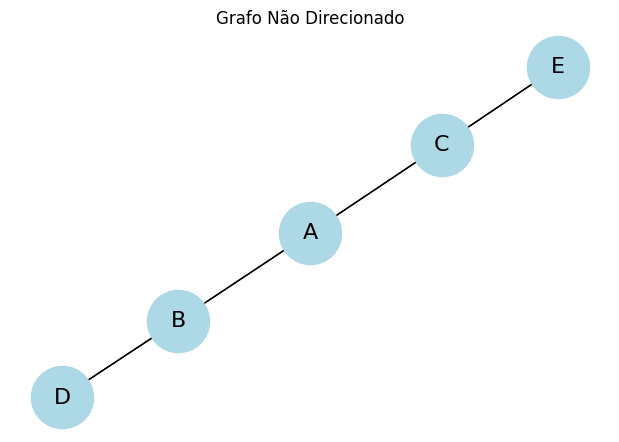


🔄 Passo 1:
Desenfileirando: A
Visitados: {'A'}
Fila: ['B', 'C']

🔄 Passo 2:
Desenfileirando: B
Visitados: {'A', 'B'}
Fila: ['C', 'D']

🔄 Passo 3:
Desenfileirando: C
Visitados: {'A', 'C', 'B'}
Fila: ['D', 'E']

🔄 Passo 4:
Desenfileirando: D
Visitados: {'D', 'A', 'C', 'B'}
Fila: ['E']

🔄 Passo 5:
Desenfileirando: E
Visitados: {'E', 'B', 'D', 'A', 'C'}
Fila: []

✅ Ordem final de visita: A → B → C → D → E


['A', 'B', 'C', 'D', 'E']

In [8]:
# BUSCA EM LARGURA (BFS)
# REALIZANDO O EXEMPLO INTUITIVO

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Criando o grafo não dirigido
G = nx.Graph()

# Adicionando vértices e arestas
vertices = ['A', 'B', 'C', 'D', 'E']
arestas = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E')]
G.add_nodes_from(vertices)
G.add_edges_from(arestas)

# Função de busca em largura (BFS)
def bfs(grafo, inicio):
    visitados = set()
    fila = deque([inicio])
    ordem_visita = []

    passo = 1
    while fila:
        print(f"\n🔄 Passo {passo}:")
        atual = fila.popleft()
        print(f"Desenfileirando: {atual}")

        if atual not in visitados:
            visitados.add(atual)
            ordem_visita.append(atual)
            print(f"Visitados: {visitados}")

            for vizinho in sorted(grafo.neighbors(atual)):
                if vizinho not in visitados:
                    fila.append(vizinho)
            print(f"Fila: {list(fila)}")
        else:
            print(f"{atual} já visitado")

        passo += 1

    print(f"\n✅ Ordem final de visita: {' → '.join(ordem_visita)}")
    return ordem_visita

# Desenhar o grafo
pos = nx.spring_layout(G)  # Layout para posicionar os nós
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16)
nx.draw_networkx_edges(G, pos)
plt.title("Grafo Não Direcionado")
plt.show()

# Executar a BFS a partir do nó 'A'
bfs(G, 'A')


Valor final alcançado: 240.0
Proporções dos itens utilizados: [1, 1, 0.6666666666666666]


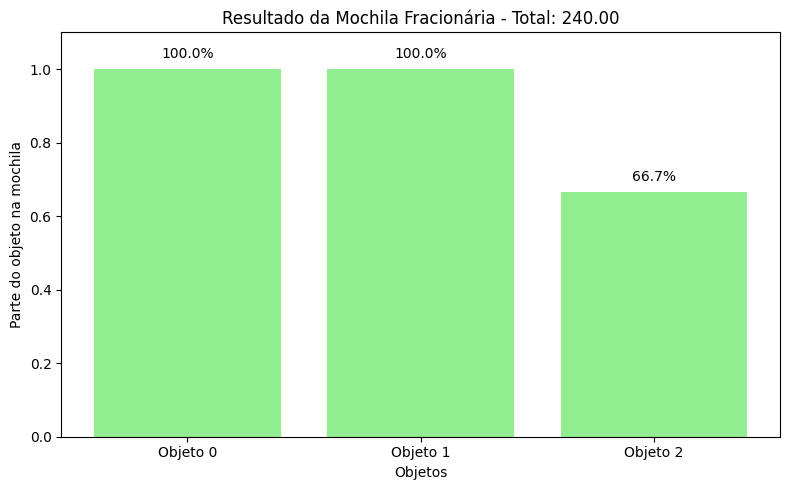

In [1]:
# ALGORITMOS GULOSOS - MOCHILA FRACIONÁRIA

import matplotlib.pyplot as plt

def mochila_fracionaria(valores, pesos, limite):
    """
    Resolve o problema da mochila fracionária utilizando uma abordagem gulosa.
    
    Parâmetros:
    - valores: lista com os valores de cada item.
    - pesos: lista com os pesos correspondentes de cada item.
    - limite: capacidade máxima da mochila.
    
    Retorna:
    - valor_acumulado: valor total obtido com os itens (ou frações deles).
    - proporcoes: lista com a fração de cada item colocada na mochila.
    """

    # Criação de uma lista de tuplas: (eficiência, valor, peso, índice original)
    # Eficiência é a razão valor/peso, usada como critério de seleção gulosa
    itens = [(val/peso, val, peso, idx) for idx, (val, peso) in enumerate(zip(valores, pesos))]

    # Ordena os itens com base na eficiência (valor/peso), do maior para o menor
    itens.sort(reverse=True)

    # Inicializa o valor total acumulado e a capacidade restante da mochila
    valor_acumulado = 0.0
    espaco_restante = limite

    # Lista que armazena a fração escolhida de cada item (0 a 1)
    proporcoes = [0] * len(valores)

    # Itera sobre os itens ordenados para preencher a mochila
    for eficiencia, val, peso, pos in itens:
        if peso <= espaco_restante:
            # Se o item inteiro cabe na mochila, adiciona ele completamente
            valor_acumulado += val
            proporcoes[pos] = 1  # Usou 100% do item
            espaco_restante -= peso  # Reduz o espaço disponível
        else:
            # Se o item não cabe inteiro, calcula a fração que cabe
            parte = espaco_restante / peso
            valor_acumulado += val * parte  # Valor proporcional adicionado
            proporcoes[pos] = parte  # Registra a fração usada
            break  # A mochila atingiu sua capacidade, não cabe mais nada

    # Retorna o valor obtido e a lista de frações de cada item
    return valor_acumulado, proporcoes

# ------------------------------
# BLOCO PRINCIPAL DO PROGRAMA
# ------------------------------

# Define os dados de entrada: valores, pesos e capacidade máxima
valores = [60, 100, 120]
pesos = [10, 20, 30]
capacidade_maxima = 50

# Chamada da função para resolver o problema
valor_total, fracoes = mochila_fracionaria(valores, pesos, capacidade_maxima)

# Mostra os resultados no terminal
print("Valor final alcançado:", valor_total)
print("Proporções dos itens utilizados:", fracoes)

# ------------------------------
# VISUALIZAÇÃO GRÁFICA
# ------------------------------

# Cria um gráfico de barras representando a fração de cada item usado
plt.figure(figsize=(8, 5))
posicoes = range(len(valores))

# Desenha as barras
plt.bar(posicoes, fracoes, tick_label=[f"Objeto {i}" for i in posicoes], color='lightgreen')

# Adiciona rótulos e título
plt.xlabel('Objetos')
plt.ylabel('Parte do objeto na mochila')
plt.title(f'Resultado da Mochila Fracionária - Total: {valor_total:.2f}')
plt.ylim(0, 1.1)  # Limite do eixo Y (até 110% para acomodar os rótulos)

# Adiciona texto acima de cada barra com a porcentagem
for i, frac in enumerate(fracoes):
    plt.text(i, frac + 0.03, f"{frac * 100:.1f}%", ha='center')

# Ajusta layout e exibe o gráfico
plt.tight_layout()
plt.show()


Atividades selecionadas (recursivo): [(1, 2), (3, 4), (5, 7), (8, 9)]


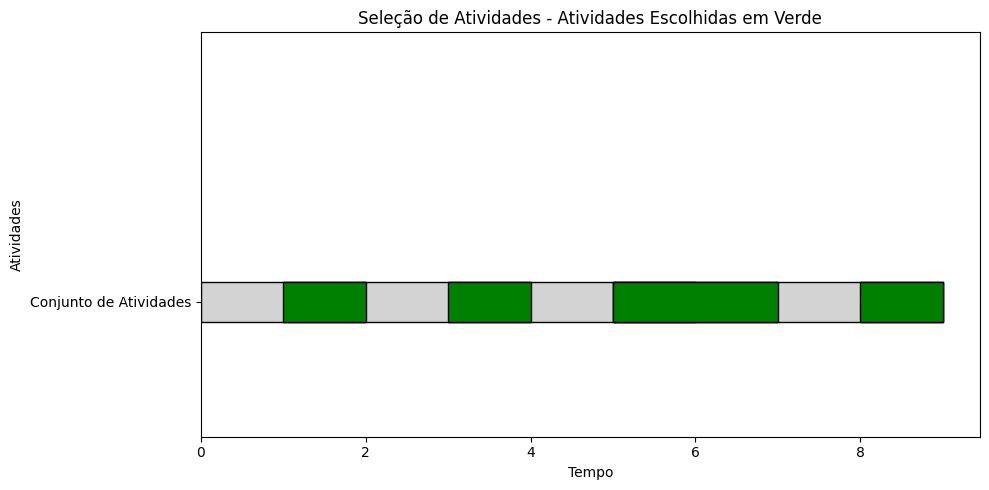

In [2]:
# ALGORITMOS GULOSOS - SELEÇÃO DE ATIVIDADE

import matplotlib.pyplot as plt

def selecionar_atividades_recursivo(inicios, fins, fim_anterior=-1, pos=0):
    """
    Seleciona atividades de forma recursiva, garantindo que nenhuma se sobreponha.
    
    Parâmetros:
    - inicios: lista com horários de início das atividades.
    - fins: lista com horários de término das atividades.
    - fim_anterior: guarda o término da última atividade aceita.
    - pos: posição atual sendo analisada.
    
    Retorna:
    - Lista de tuplas (início, fim) representando as atividades selecionadas.
    """
    # Caso base: quando já analisamos todas as atividades
    if pos >= len(inicios):
        return []

    # Verifica se a atividade atual pode ser incluída
    if inicios[pos] >= fim_anterior:
        # Se puder, inclui e continua a busca com fim atualizado
        escolhidas = [(inicios[pos], fins[pos])] + \
                     selecionar_atividades_recursivo(inicios, fins, fins[pos], pos + 1)
    else:
        # Caso contrário, ignora a atual e tenta a próxima
        escolhidas = selecionar_atividades_recursivo(inicios, fins, fim_anterior, pos + 1)

    return escolhidas

def selecionar_atividades(inicios, fins):
    """
    Seleciona atividades de forma iterativa (gulosa) com base no menor tempo de término.

    Parâmetros:
    - inicios: lista de horários de início.
    - fins: lista de horários de fim.

    Retorna:
    - Lista com as atividades (início, fim) selecionadas.
    """
    # Une início e fim em tuplas e ordena pelo tempo de término (fim)
    tarefas = list(zip(inicios, fins))
    tarefas.sort(key=lambda x: x[1])  # Ordena pelo segundo elemento da tupla (fim)

    # Lista que guardará as atividades aceitas
    escolhidas = []

    # Guarda o fim da última atividade aceita
    fim_atual = -1

    # Analisa cada atividade
    for inicio, fim in tarefas:
        if inicio >= fim_atual:
            escolhidas.append((inicio, fim))  # Adiciona à lista final
            fim_atual = fim  # Atualiza o fim atual

    return escolhidas

# ------------------------------
# DADOS DE ENTRADA
# ------------------------------

inicios = [1, 3, 0, 5, 8, 5]
fins = [2, 4, 6, 7, 9, 9]

# Seleção gulosa (iterativa)
selecionadas_iterativo = selecionar_atividades(inicios, fins)

# Pré-processamento: ordenar atividades para a versão recursiva
atividades_ordenadas = sorted(zip(inicios, fins), key=lambda x: x[1])
inicios_ordenados, fins_ordenados = zip(*atividades_ordenadas)

# Seleção recursiva
selecionadas_recursivo = selecionar_atividades_recursivo(inicios_ordenados, fins_ordenados)

# Exibição no console
print("Atividades selecionadas (recursivo):", selecionadas_recursivo)
# Saída esperada: [(1, 2), (3, 4), (5, 7), (8, 9)]

# ------------------------------
# VISUALIZAÇÃO GRÁFICA
# ------------------------------

plt.figure(figsize=(10, 5))
nivel_y = 1         # Altura para desenhar as barras
altura_barra = 0.3  # Espessura da barra

# Desenha todas as atividades em cinza
for ini, fim in zip(inicios_ordenados, fins_ordenados):
    plt.barh(nivel_y, fim - ini, left=ini, height=altura_barra,
             color='lightgray', edgecolor='black')

# Destaca as atividades selecionadas em verde
for ini, fim in selecionadas_iterativo:
    plt.barh(nivel_y, fim - ini, left=ini, height=altura_barra,
             color='green', edgecolor='black')

# Personalização do gráfico
plt.xlabel('Tempo')
plt.ylabel('Atividades')
plt.title('Seleção de Atividades - Atividades Escolhidas em Verde')
plt.yticks([nivel_y], ["Conjunto de Atividades"])
plt.ylim(nivel_y - 1, nivel_y + 2)
plt.tight_layout()
plt.show()


In [6]:
# ALGORITMOS GULOSOS - PROBLEMAS DAS MOEDAS OU TROCO MÍNIMO

import sys

def troco_minimo_recursivo(moedas, valor_restante, pos=0, total_usadas=0):
    """
    Abordagem recursiva gulosa para calcular o número mínimo de moedas.
    
    :param moedas: Lista de denominações ordenadas em ordem decrescente.
    :param valor_restante: Valor que ainda precisa ser completado.
    :param pos: Índice atual da moeda sendo analisada.
    :param total_usadas: Contador de moedas usadas até o momento.
    :return: Total de moedas usadas ou infinito se não for possível atingir o valor.
    """
    # Caso base: valor alcançado
    if valor_restante == 0:
        return total_usadas

    # Caso base: esgotou as moedas ou valor negativo
    if pos >= len(moedas) or valor_restante < 0:
        return float('inf')

    # Pega o máximo de moedas dessa denominação possível
    max_usos = valor_restante // moedas[pos]

    # Atualiza os valores e segue para a próxima moeda
    novo_valor = valor_restante - max_usos * moedas[pos]
    return troco_minimo_recursivo(moedas, novo_valor, pos + 1, total_usadas + max_usos)

def resolver_troco_guloso(moedas, valor):
    """
    Função auxiliar para iniciar a recursão com moedas ordenadas.
    
    :param moedas: Lista de moedas disponíveis.
    :param valor: Valor-alvo.
    :return: Mínimo número de moedas necessárias ou -1 se não for possível.
    """
    moedas.sort(reverse=True)
    resultado = troco_minimo_recursivo(moedas, valor)
    return resultado if resultado != float('inf') else -1

def troco_guloso_iterativo(moedas, alvo):
    """
    Abordagem iterativa gulosa para encontrar o troco mínimo.
    
    :param moedas: Lista de denominações disponíveis.
    :param alvo: Valor que se deseja atingir.
    :return: Número de moedas usadas e a lista de (moeda, quantidade).
    """
    moedas.sort(reverse=True)  # Ordena para pegar sempre a maior moeda primeiro
    total_moedas = 0           # Total de moedas utilizadas
    combinacao = []            # Lista de tuplas (moeda, quantidade usada)
    restante = alvo            # Valor que falta completar

    for moeda in moedas:
        quantidade = restante // moeda
        if quantidade > 0:
            combinacao.append((moeda, quantidade))
            total_moedas += quantidade
            restante -= quantidade * moeda

        if restante == 0:
            break  # Já atingimos o valor desejado

    if restante != 0:
        return -1, []  # Impossível montar o valor com as moedas dadas

    return total_moedas, combinacao

# ------------------------
# EXEMPLO DE USO
# ------------------------

disponiveis = [1, 5, 10, 25]
valor_desejado = 63

# Versão iterativa gulosa
minimo_moedas, combinacao_utilizada = troco_guloso_iterativo(disponiveis, valor_desejado)

print("Número mínimo de moedas:", minimo_moedas)
print("Combinação de moedas:")
for moeda, qtd in combinacao_utilizada:
    print(f"{qtd} moeda(s) de {moeda}")
# Saída esperada:
# Número mínimo de moedas: 6
# 2 moeda(s) de 25
# 1 moeda(s) de 10
# 3 moeda(s) de 1

# Versão recursiva gulosa
resultado_recursivo = resolver_troco_guloso(disponiveis, valor_desejado)
print("Número mínimo de moedas (recursivo):", resultado_recursivo)
# Saída esperada: 6


Número mínimo de moedas: 6
Combinação de moedas:
2 moeda(s) de 25
1 moeda(s) de 10
3 moeda(s) de 1
Número mínimo de moedas (recursivo): 6


ANÁLISE DE CAMINHOS A PARTIR DE 'A'
-> Para 'A':
   - Distância Mínima: 0
   - Caminho: A
-> Para 'B':
   - Distância Mínima: 2
   - Caminho: A → B
-> Para 'C':
   - Distância Mínima: 3
   - Caminho: A → B → C
-> Para 'D':
   - Distância Mínima: 7
   - Caminho: A → B → C → E → D
-> Para 'E':
   - Distância Mínima: 6
   - Caminho: A → B → C → E
----------------------------------------

Gerando gráfico com o caminho para 'E' destacado...


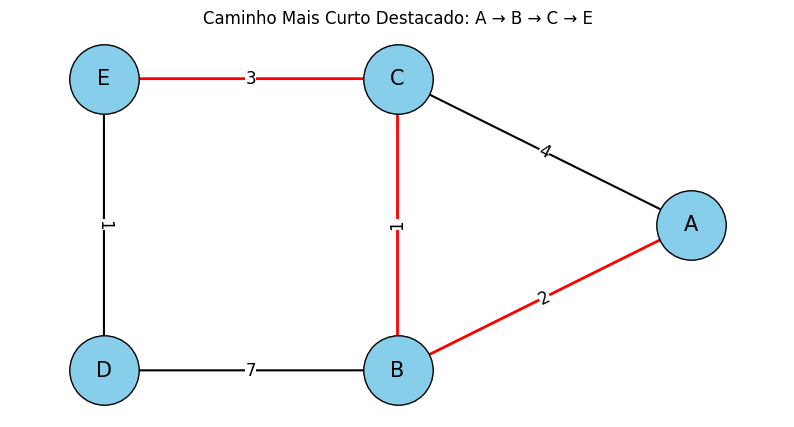

In [ ]:
# ALGORITMOS GULOSOS - ALGORITMO DE DIJKSTRA

"""
Script Completo para Análise de Grafos com Dijkstra e Visualização

Este script realiza as seguintes operações:
1. Define um grafo ponderado representando cidades e distâncias.
2. Utiliza o algoritmo de Dijkstra para encontrar o caminho mais curto de uma cidade de origem para todas as outras.
3. Imprime os resultados (distância e caminho) no console.
4. Gera uma visualização gráfica estilizada, destacando o caminho mais curto para um destino específico.
"""

# --------------------------------------------------------------------------
# 1. IMPORTAÇÃO DE BIBLIOTECAS
# --------------------------------------------------------------------------
import networkx as nx
import matplotlib.pyplot as plt


# --------------------------------------------------------------------------
# 2. FUNÇÕES DO ALGORITMO (LÓGICA CENTRAL)
# --------------------------------------------------------------------------

def encontrar_menor_caminho(grafo, inicio):
    """
    Encontra os menores caminhos de um nó de origem para todos os outros usando Dijkstra.

    Esta implementação utiliza uma lista simples para gerenciar os nós não visitados, sendo
    ideal para fins didáticos.

    :param grafo: Dicionário representando o grafo. Ex: {'A': [('B', 2), ...]}
    :param inicio: O nó (vértice) de partida.
    :return: Uma tupla contendo dois dicionários:
             - distancias: As menores distâncias da origem para cada nó.
             - predecessores: O nó anterior no caminho mais curto para cada nó.
    """
    # Inicializa as distâncias com infinito e a da origem como 0.
    distancias = {vertice: float('inf') for vertice in grafo}
    distancias[inicio] = 0
    
    # Dicionário para reconstruir o caminho posteriormente.
    predecessores = {vertice: None for vertice in grafo}
    
    # Lista de todos os nós que ainda não foram processados.
    nao_visitados = list(grafo.keys())

    while nao_visitados:
        # Seleciona o nó não visitado com a menor distância atual.
        vertice_atual = min(nao_visitados, key=lambda vertice: distancias[vertice])
        
        # Remove o nó atual da lista de não visitados, pois será processado agora.
        nao_visitados.remove(vertice_atual)
        
        # Para cada vizinho do vértice atual, verifica se um caminho mais curto foi encontrado.
        for vizinho, peso in grafo[vertice_atual]:
            distancia_alternativa = distancias[vertice_atual] + peso
            
            # Se o novo caminho for mais curto, atualiza a distância e o predecessor.
            if distancia_alternativa < distancias[vizinho]:
                distancias[vizinho] = distancia_alternativa
                predecessores[vizinho] = vertice_atual
                
    return distancias, predecessores


def reconstruir_caminho(predecessores, inicio, fim):
    """
    Reconstrói o caminho do início ao fim a partir do dicionário de predecessores.

    :param predecessores: Dicionário gerado pelo algoritmo de Dijkstra.
    :param inicio: O nó de partida do caminho.
    :param fim: O nó de destino do caminho.
    :return: Uma lista de nós representando o caminho.
    """
    caminho = []
    vertice_atual = fim
    
    # Volta do fim para o início, seguindo os predecessores.
    while vertice_atual is not None:
        caminho.append(vertice_atual)
        vertice_atual = predecessores[vertice_atual]
    
    # O caminho foi construído de trás para frente, então é preciso invertê-lo.
    caminho.reverse()
    
    # Se o caminho reconstruído não começar na origem, significa que não há rota.
    if not caminho or caminho[0] != inicio:
        return []
        
    return caminho


# --------------------------------------------------------------------------
# 3. FUNÇÃO DE VISUALIZAÇÃO
# --------------------------------------------------------------------------

def desenhar_grafo_caminho(caminho_destacado):
    """
    Cria e exibe uma visualização gráfica precisa, destacando um caminho específico.

    Esta função desenha um layout fixo, idêntico ao da imagem de referência,
    separando as arestas por cor para um controle visual completo.

    :param caminho_destacado: A lista de nós do caminho a ser destacado em vermelho.
    """
    # Cria um grafo direcionado vazio para a visualização.
    G = nx.DiGraph()

    # Define as arestas e pesos exatamente como devem aparecer na imagem.
    arestas_visiveis = [
        ('A', 'B', 2), ('B', 'C', 1), ('C', 'E', 3), # Caminho principal
        ('C', 'A', 4), ('E', 'D', 1), ('B', 'D', 7)  # Outras conexões
    ]
    G.add_weighted_edges_from(arestas_visiveis)

    # Define as posições manuais para replicar o layout da imagem.
    pos = {'A': (3, 0), 'B': (0, -1), 'C': (0, 1), 'D': (-3, -1), 'E': (-3, 1)}

    # Separa as arestas por cor com base no caminho a ser destacado.
    arestas_caminho_tuplas = list(zip(caminho_destacado, caminho_destacado[1:]))
    arestas_pretas = [e for e in G.edges() if e not in arestas_caminho_tuplas]
    
    # Obtém todos os rótulos de peso.
    rotulos_arestas = nx.get_edge_attributes(G, 'weight')

    # Inicia a figura para o desenho.
    plt.figure(figsize=(10, 5))

    # Desenha os componentes em camadas para controle total:
    # 1. Nós e seus rótulos
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=2500, edgecolors='black')
    nx.draw_networkx_labels(G, pos, font_size=15, font_color='black')

    # 2. Arestas pretas (não pertencentes ao caminho)
    nx.draw_networkx_edges(G, pos, edgelist=arestas_pretas, edge_color='black',
                           width=1.5, arrows=True, arrowsize=25)

    # 3. Arestas vermelhas (do caminho destacado)
    nx.draw_networkx_edges(G, pos, edgelist=arestas_caminho_tuplas, edge_color='red',
                           width=2.0, arrows=True, arrowsize=25)
    
    # 4. Rótulos de peso das arestas
    nx.draw_networkx_edge_labels(G, pos, edge_labels=rotulos_arestas, font_size=12,
                               bbox=dict(facecolor='white', edgecolor='none', pad=0.1))

    # Configurações finais do gráfico.
    plt.title(f"Caminho Mais Curto Destacado: {' → '.join(caminho_destacado)}")
    plt.box(False)
    ax = plt.gca()
    ax.margins(0.1)
    plt.show()


# --------------------------------------------------------------------------
# 4. BLOCO DE EXECUÇÃO PRINCIPAL
# --------------------------------------------------------------------------

if __name__ == "__main__":
    # Definição da estrutura do grafo com todas as conexões bidirecionais.
    grafo_cidades = {
        'A': [('B', 2), ('C', 4)],
        'B': [('A', 2), ('C', 1), ('D', 7)],
        'C': [('A', 4), ('B', 1), ('E', 3)],
        'D': [('B', 7), ('E', 1)],
        'E': [('C', 3), ('D', 1)],
    }

    # Define os pontos de partida e destino para a análise.
    cidade_origem = 'A'
    cidade_destino_visual = 'E'

    # --- Passo 1: Executar o algoritmo ---
    distancias, predecessores = encontrar_menor_caminho(grafo_cidades, cidade_origem)
    
    # --- Passo 2: Imprimir os resultados no console ---
    print("=" * 40)
    print(f"ANÁLISE DE CAMINHOS A PARTIR DE '{cidade_origem}'")
    print("=" * 40)
    
    for cidade in sorted(grafo_cidades.keys()):
        caminho = reconstruir_caminho(predecessores, cidade_origem, cidade)
        if caminho:
            print(f"-> Para '{cidade}':")
            print(f"   - Distância Mínima: {distancias[cidade]}")
            print(f"   - Caminho: {' → '.join(caminho)}")
        else:
            print(f"-> Para '{cidade}': Não há caminho alcançável.")
    print("-" * 40)

    # --- Passo 3: Gerar a visualização gráfica ---
    # Reconstrói o caminho específico que será destacado no gráfico.
    caminho_para_desenhar = reconstruir_caminho(predecessores, cidade_origem, cidade_destino_visual)
    
    if caminho_para_desenhar:
        print(f"\nGerando gráfico com o caminho para '{cidade_destino_visual}' destacado...")
        desenhar_grafo_caminho(caminho_para_desenhar)
    else:
        print(f"Não foi possível gerar o gráfico, pois não há caminho para '{cidade_destino_visual}'.")

      RESULTADO DA COMPARAÇÃO DE ALGORITMOS

**Algoritmo A***
Caminho Encontrado: A -> B -> C -> E
Custo Total: 6
Tempo de Execução (s): 0.000000
Uso de Memória (bytes): 1832

**Algoritmo de Dijkstra**
Caminho Encontrado: A -> B -> C -> E
Custo Total: 6
Tempo de Execução (s): 0.000000
Uso de Memória (bytes): 2240
---------------------------------------------

Exibindo o grafo com o caminho encontrado pelo A*...


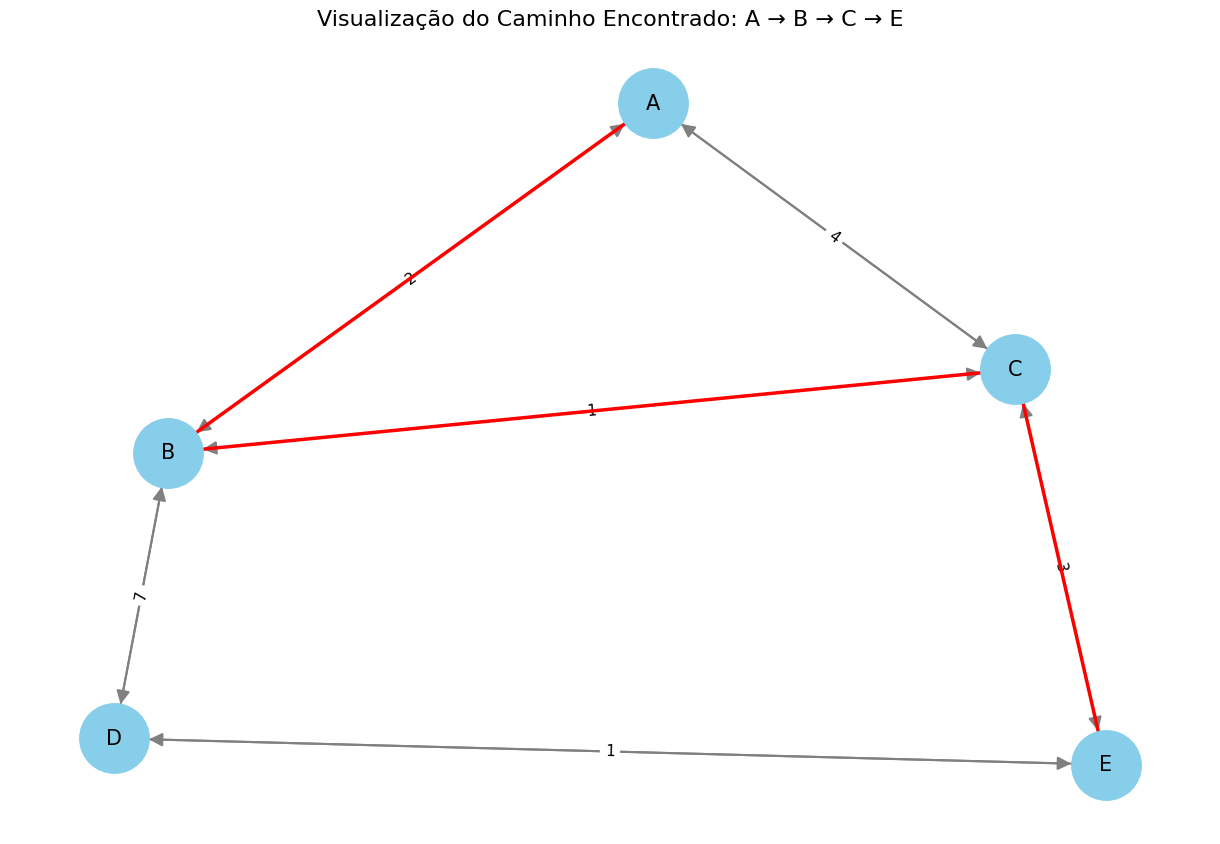

In [28]:
# ALGORITMO A* E ALGORITMO DE DIJKSTRA

"""
SCRIPT FINAL E COMENTADO

Este script realiza uma análise comparativa de desempenho entre os algoritmos
A* e Dijkstra para encontrar o caminho mais curto em um grafo.

Funcionalidades:
1. Implementa os algoritmos A* e Dijkstra, medindo tempo de execução e uso de memória.
2. Executa ambos os algoritmos com um conjunto de dados predefinido.
3. Imprime uma tabela comparativa dos resultados no console.
4. Gera e exibe uma visualização gráfica do grafo, destacando o caminho
   encontrado pelo algoritmo A*.
"""

# ==============================================================================
# 1. IMPORTAÇÃO DE BIBLIOTECAS
# ==============================================================================
import time  # Para medir o tempo de execução dos algoritmos.
import sys   # Para estimar o uso de memória das estruturas de dados.
import networkx as nx  # Biblioteca principal para criação e manipulação de grafos.
import matplotlib.pyplot as plt  # Biblioteca para gerar os gráficos.


# ==============================================================================
# 2. IMPLEMENTAÇÃO DOS ALGORITMOS DE BUSCA
# ==============================================================================

def executar_a_estrela(dados_grafo, estimativas_h, ponto_partida, ponto_chegada):
    """
    Executa o Algoritmo A* para encontrar o caminho mais curto.

    A* utiliza uma heurística para guiar sua busca, tornando-o geralmente
    mais rápido que o Dijkstra em grafos grandes.

    :param dados_grafo: Dicionário representando o grafo.
    :param estimativas_h: Dicionário com os custos heurísticos de cada nó até o objetivo.
    :param ponto_partida: Nó inicial da busca.
    :param ponto_chegada: Nó objetivo da busca.
    :return: Tupla com (caminho, custo, tempo_de_execucao, memoria_utilizada).
    """
    # Inicia a medição de tempo e a contagem de memória.
    inicio_tempo = time.time()
    uso_memoria = 0
    
    # 'fronteira' (ou open list) armazena os nós a serem explorados.
    # Cada item é uma tupla: (f(n), g(n), nó, caminho_até_ele)
    # f(n) = g(n) + h(n) -> Custo total estimado
    # g(n) -> Custo real do caminho desde o início
    fronteira = [(0 + estimativas_h[ponto_partida], 0, ponto_partida, [])]
    
    # 'explorados' (ou closed list) armazena nós já visitados pelo caminho mais curto.
    explorados = set()

    # O loop continua enquanto houver nós promissores na fronteira.
    while fronteira:
        # Ordena a fronteira para que o nó com o menor custo f(n) seja o primeiro.
        fronteira.sort(key=lambda item: item[0])
        
        # Extrai o nó mais promissor da fronteira para explorá-lo.
        f_custo, g_custo, no_corrente, trilha = fronteira.pop(0)
        
        # Estima o uso de memória (de forma simplificada) a cada iteração.
        uso_memoria += sys.getsizeof(fronteira) + sys.getsizeof(explorados) + sys.getsizeof(trilha)

        # Se já encontramos um caminho mais curto para este nó, o ignoramos.
        if no_corrente in explorados:
            continue

        # Adiciona o nó atual à trilha do caminho.
        trilha = trilha + [no_corrente]
        # Marca o nó como explorado.
        explorados.add(no_corrente)

        # CONDIÇÃO DE PARADA: Se o nó atual é o nosso objetivo, encontramos o caminho.
        if no_corrente == ponto_chegada:
            fim_tempo = time.time()
            tempo_execucao = fim_tempo - inicio_tempo
            return trilha, g_custo, tempo_execucao, uso_memoria

        # Expande o nó atual, analisando seus vizinhos.
        for vizinho, custo_aresta in dados_grafo.get(no_corrente, []):
            if vizinho not in explorados:
                # Calcula o novo custo real (g) para o vizinho.
                g_novo = g_custo + custo_aresta
                # Calcula o novo custo estimado (f) para o vizinho.
                f_novo = g_novo + estimativas_h[vizinho]
                # Adiciona o vizinho à fronteira para futura exploração.
                fronteira.append((f_novo, g_novo, vizinho, trilha))

    # Se a fronteira ficar vazia e o objetivo não for alcançado, não há caminho.
    fim_tempo = time.time()
    tempo_execucao = fim_tempo - inicio_tempo
    return None, float('inf'), tempo_execucao, uso_memoria


def executar_dijkstra(dados_grafo, ponto_partida, ponto_chegada):
    """
    Executa o Algoritmo de Dijkstra para encontrar o caminho mais curto.

    Dijkstra explora o grafo de forma radial, sempre escolhendo o nó
    com a menor distância acumulada desde a origem.

    :param dados_grafo: Dicionário representando o grafo.
    :param ponto_partida: Nó inicial da busca.
    :param ponto_chegada: Nó objetivo da busca.
    :return: Tupla com (caminho, custo, tempo_de_execucao, memoria_utilizada).
    """
    # Inicia a medição de tempo e a contagem de memória.
    inicio_tempo = time.time()
    uso_memoria = 0
    
    # Dicionário para armazenar a menor distância encontrada até cada nó.
    distancias = {no: float('inf') for no in dados_grafo}
    # Dicionário para rastrear o "pai" de cada nó no caminho mais curto.
    antecessores = {no: None for no in dados_grafo}
    # A distância da origem para ela mesma é sempre 0.
    distancias[ponto_partida] = 0
    # Lista de nós que ainda não foram visitados.
    nao_visitados = list(dados_grafo.keys())

    while nao_visitados:
        # Encontra o nó não visitado com a menor distância registrada.
        no_corrente = min(nao_visitados, key=lambda no: distancias[no])
        
        uso_memoria += sys.getsizeof(nao_visitados) + sys.getsizeof(distancias) + sys.getsizeof(antecessores)

        # CONDIÇÃO DE PARADA: Se o nó mais próximo está a uma distância infinita ou se já é o objetivo.
        if distancias[no_corrente] == float('inf') or no_corrente == ponto_chegada:
            break

        # Remove o nó atual da lista de não visitados.
        nao_visitados.remove(no_corrente)

        # Para cada vizinho do nó atual...
        for vizinho, custo_aresta in dados_grafo.get(no_corrente, []):
            # ...calcula a distância através do nó atual.
            nova_distancia = distancias[no_corrente] + custo_aresta
            # Se este caminho for mais curto do que o já conhecido...
            if nova_distancia < distancias[vizinho]:
                # ...atualiza a menor distância e o antecessor.
                distancias[vizinho] = nova_distancia
                antecessores[vizinho] = no_corrente

    # Após o loop, reconstrói o caminho do final para o início.
    trilha = []
    if distancias[ponto_chegada] != float('inf'): # Verifica se um caminho foi encontrado.
        no_atual = ponto_chegada
        while no_atual is not None:
            trilha.insert(0, no_atual) # Insere no início para manter a ordem correta.
            no_atual = antecessores.get(no_atual)
            
    fim_tempo = time.time()
    tempo_execucao = fim_tempo - inicio_tempo
    
    if not trilha:
        return None, float('inf'), tempo_execucao, uso_memoria
        
    return trilha, distancias[ponto_chegada], tempo_execucao, uso_memoria


# ==============================================================================
# 3. FUNÇÃO DE VISUALIZAÇÃO GRÁFICA
# ==============================================================================

def exibir_grafo_com_caminho(dados_grafo, caminho_destacado):
    """
    Cria e exibe uma visualização do grafo usando NetworkX e Matplotlib,
    destacando um caminho específico em vermelho.

    :param dados_grafo: Dicionário com os dados do grafo.
    :param caminho_destacado: Lista de nós que compõem o caminho a ser destacado.
    """
    # Cria um objeto de grafo direcionado (com setas).
    G = nx.DiGraph()
    # Adiciona as arestas e pesos a partir dos dados.
    for no, arestas in dados_grafo.items():
        for vizinho, custo in arestas:
            G.add_edge(no, vizinho, weight=custo)

    # Define o layout para posicionar os nós de forma visualmente agradável.
    # O 'seed' garante que o layout seja sempre o mesmo, para reprodutibilidade.
    pos = nx.spring_layout(G, seed=42, k=0.8) # 'k' ajusta o espaçamento.
    
    # Prepara os dados para o desenho.
    rotulos_arestas = nx.get_edge_attributes(G, 'weight')
    arestas_do_caminho = list(zip(caminho_destacado, caminho_destacado[1:]))

    # Cria a figura onde o gráfico será desenhado.
    plt.figure(figsize=(12, 8))
    
    # Desenha o grafo base (nós e todas as arestas em cinza).
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2500, 
            font_size=15, width=1.5, edge_color='gray', arrows=True, arrowsize=20)
    
    # Adiciona os rótulos de peso às arestas.
    nx.draw_networkx_edge_labels(G, pos, edge_labels=rotulos_arestas, font_size=11)
    
    # Desenha por cima apenas as arestas do caminho encontrado, em vermelho.
    nx.draw_networkx_edges(G, pos, edgelist=arestas_do_caminho, edge_color='red', width=2.5, arrowsize=20)
    
    # Define o título e exibe o gráfico.
    plt.title(f"Visualização do Caminho Encontrado: {' → '.join(caminho_destacado)}", size=16)
    plt.show()


# ==============================================================================
# 4. BLOCO DE EXECUÇÃO PRINCIPAL
# ==============================================================================

# Este bloco só é executado quando o script é rodado diretamente.
if __name__ == "__main__":
    
    # --- Definição dos Dados de Entrada ---
    # Estrutura do grafo: {origem: [(destino, custo), ...]}
    mapa_dos_nos = {
        'A': [('B', 2), ('C', 4)],
        'B': [('A', 2), ('C', 1), ('D', 7)],
        'C': [('A', 4), ('B', 1), ('E', 3)],
        'D': [('B', 7), ('E', 1)],
        'E': [('C', 3), ('D', 1)],
    }
    # Heurística (custo estimado) de cada nó até o ponto final 'E'.
    estimativas_para_o_final = { 'A': 6, 'B': 4, 'C': 2, 'D': 1, 'E': 0 }
    
    # Pontos de partida e chegada.
    ponto_de_partida = 'A'
    ponto_de_chegada = 'E'

    # --- Execução dos Algoritmos ---
    # Roda o A* e armazena seus resultados.
    caminho_a, custo_a, tempo_a, memoria_a = executar_a_estrela(mapa_dos_nos, estimativas_para_o_final, ponto_de_partida, ponto_de_chegada)
    # Roda o Dijkstra e armazena seus resultados.
    caminho_d, custo_d, tempo_d, memoria_d = executar_dijkstra(mapa_dos_nos, ponto_de_partida, ponto_de_chegada)

    # --- Apresentação dos Resultados no Console ---
    print("=" * 45)
    print("      RESULTADO DA COMPARAÇÃO DE ALGORITMOS")
    print("=" * 45)
    
    print("\n**Algoritmo A***")
    if caminho_a:
        print(f"Caminho Encontrado: {' -> '.join(caminho_a)}")
        print(f"Custo Total: {custo_a}")
    else:
        print("Caminho não encontrado.")
    print(f"Tempo de Execução (s): {tempo_a:.6f}")
    print(f"Uso de Memória (bytes): {memoria_a}")

    print("\n**Algoritmo de Dijkstra**")
    if caminho_d:
        print(f"Caminho Encontrado: {' -> '.join(caminho_d)}")
        print(f"Custo Total: {custo_d}")
    else:
        print("Caminho não encontrado.")
    print(f"Tempo de Execução (s): {tempo_d:.6f}")
    print(f"Uso de Memória (bytes): {memoria_d}")
    print("-" * 45)

    # --- Geração da Visualização Gráfica ---
    # Se o A* encontrou um caminho, exibe o grafo com esse caminho destacado.
    if caminho_a:
        print("\nExibindo o grafo com o caminho encontrado pelo A*...")
        exibir_grafo_com_caminho(mapa_dos_nos, caminho_a)
    else:
        print("\nNão foi possível gerar o gráfico, pois nenhum caminho foi encontrado.")